In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scifit.solvers import FitSolver1D

https://stackoverflow.com/questions/77539906/curve-fitting-rheology-data-to-carreau-yasuda-model

In [2]:
def carreau(x, n_0, n_inf, lamda, a, n):
        return n_inf + (n_0 - n_inf) * np.power((1 + np.power((x[:, 0] * lamda), a)), ((n - 1) / a))

In [3]:
class Model(FitSolver1D):
    @staticmethod
    def model(x, n_0, n_inf, lamda, a, n):
        return carreau(x, n_0, n_inf, lamda, a, n)

In [4]:
model = Model()

In [5]:
np.random.seed(12345)

In [18]:
parameters = (4e-2, 5e-4, 1.6, 2.1, 0.3)
X = np.logspace(-4, 4, 30, base=10).reshape(-1, 1)
y = carreau(X, *parameters)
sigma = 1e-6 * np.ones(y.size)
y += sigma * np.random.normal(size=y.size)

In [20]:
popt, pcov = optimize.curve_fit(
    carreau, X, y, sigma=sigma, absolute_sigma=True,
    p0=(1e-2, 1e-4, 1, 1, 1)
)
popt, pcov

(array([3.99998407e-02, 4.99859627e-04, 1.59989329e+00, 2.10012984e+00,
        2.99977836e-01]),
 array([[ 8.70441115e-14,  6.83233009e-15, -1.13478036e-11,
         -4.07026092e-11, -3.37906437e-12],
        [ 6.83233009e-15,  1.80387614e-13, -6.38991361e-11,
         -5.97764470e-11, -2.40625361e-11],
        [-1.13478036e-11, -6.38991361e-11,  9.80286153e-08,
          1.18068698e-07,  2.49233020e-08],
        [-4.07026092e-11, -5.97764470e-11,  1.18068698e-07,
          1.97828917e-07,  2.69362764e-08],
        [-3.37906437e-12, -2.40625361e-11,  2.49233020e-08,
          2.69362764e-08,  7.40628771e-09]]))

In [21]:
popt, pcov = optimize.curve_fit(
    carreau, X, y, sigma=sigma, absolute_sigma=True,
    method="trf", bounds=[(1e-3, 1e-5, 0, 0, 0), (1e-1, 1e-3, 10, 3, 1)]
)
popt, pcov

(array([3.99998407e-02, 4.99859627e-04, 1.59989329e+00, 2.10012983e+00,
        2.99977836e-01]),
 array([[ 8.70441109e-14,  6.83231005e-15, -1.13477916e-11,
         -4.07026010e-11, -3.37906037e-12],
        [ 6.83231005e-15,  1.80387631e-13, -6.38991565e-11,
         -5.97764630e-11, -2.40625409e-11],
        [-1.13477916e-11, -6.38991565e-11,  9.80286394e-08,
          1.18068732e-07,  2.49233082e-08],
        [-4.07026010e-11, -5.97764630e-11,  1.18068732e-07,
          1.97828972e-07,  2.69362846e-08],
        [-3.37906037e-12, -2.40625409e-11,  2.49233082e-08,
          2.69362846e-08,  7.40628919e-09]]))

In [9]:
data = model.synthetic_dataset(xdata=X, parameters=parameters, sigma=1e-6, scale_mode="abs")

In [10]:
sol = model.fit(data, p0=(1e-2, 1e-4, 1, 1, 1))

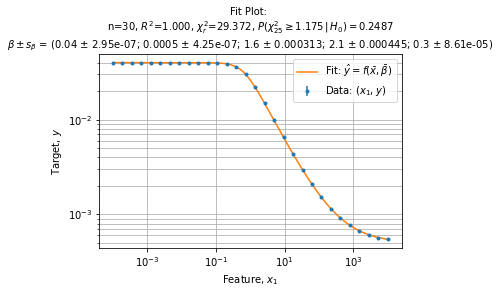

In [11]:
axe = model.plot_fit(log_y=True, log_x=True)
axe.grid()
axe.grid(which="both")

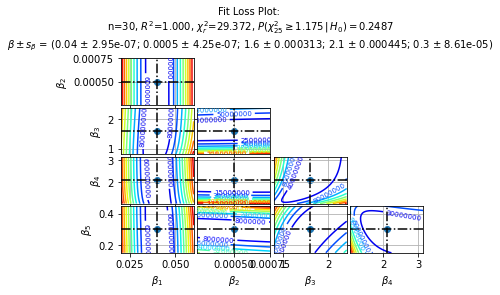

In [12]:
axe = model.plot_loss()